# DataLab

# Koulutus: 23.11.2021

# Aihe: Ryhmittely hierarkisella klusterointialgoritmilla

Tässä työkirjassa käsittelemme datan ryhmittelyä eli klusterointia käyttäen hierarkista klusterointialgoritmia.

Luomme ensin keinotekoista dataa, jossa klustereiden eli ryhmien määrä on tunnettu ja sen jälkeen yritämme klusteroida dataa hierarkisella klusterointialgoritmilla. Huomaa, että käytännössä ei juuri koskaan tiedetä täsmällistä vastausta kysymykseen montako klusteria datassa on, sopiva vastaus riippuu ryhmittelyn tarkoituksesta. Usein se, montako klusteria datassa voisi olla ja se, monellako klusterilla sitä mallinnetaan, eroavat toisistaan.

In [1]:
# Ladataan peruskirjastot eli Numpy ja Pandas:
import numpy as np
import pandas as pd

# Visualisointikirjasto Matplotlib ladataan seuraavaksi:
import matplotlib.pyplot as plt

# Keinotekoisen datan generointiin soveltuva funktio:
from sklearn.datasets import make_blobs

# Kirjastoja, jotka tarjoavat klusterointialgortimeja:

# Vaihtoehto 1: käytä scikit-learn -kirjastoa:
from sklearn.cluster import AgglomerativeClustering 

# Vaihtoehto 2: käytä scipy.cluster.hierarchy -kirjastoa
from scipy.cluster.hierarchy import dendrogram, linkage 

# Ryhmittely eli klusterointi


Ryhmittelyalgoritmeilla pyritään löytämään merkityksellisiä ryhmiä datasta. Algoritmeilla on joku matemaattisesti määritely funktio, jota optimoidaan tai vain algoritminen kuvaus, jolla ryhmiä löydetään. Se, onko löydetyt ryhmät merkityksellisiä, jää ihmisen päätettäväksi. Klusteroinnin ominaisuuksia voidaan kuitenkin mitata siinä mielessä ovatko ryhmien kuvaukset kompakteja ja ryhmät toisistaan eroavia. Mikään algorimi ei kuitenkaan voi itse päättää onko löydetty ryhmittely hyvä tai merkityksellinen.



Seuraavassa luomme keinotekoisen datajoukon, jonka tarkoituksena on toimia kontrolloituna esimerkkinä siitä, että datassa on toisistaan eroavia ryhmiä, joita voidaan algorimtmisesti etsiä. Käytämme tässä sklearn -kirjaston funktiota, jolla voi helposti luoda esimerkkiaineistoja.

## Luodaan keinotekoista dataa, jossa klustereiden määrä on tunnettu:

Kun keinotekoista dataa luodaan, pitää määritellä datan dimensio eli kuinka monta muuttujaa datassa on, sek se, kuinka monta klusteria tai ryhmää halutaan.

In [2]:
# Seuraavaksi luodaan dataa, joka koostuu kolmesta ryhmästä (centers=3), kukin vektoreista sisältää
# kaksi mittausta (n_features=2):

# ALKUPERÄINEN: X_data, X_cluster_index = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
X_data, X_cluster_index = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

# Voidaan tarkastella dataa ja klusteri-indeksejä eli sitä mihin ryhmään kukin datavektori kuuluu.
# Voit ajaa koodia ottamalla kommenttimerkin pois ja evaluoimalla solun:

# Datan dimensiot eli rivien määrän ja sarakkeiden määrän näkee seuraavalla komennolla:
# print(X_data.shape)

# Muuttuja X_data sisältää itse ryhmiteltävän datan
# Muuttuja X_cluster_index on indeksimuuttuja (0,1,2,...), joka kertoo mihin klusteriin mittausvektori kuuluu
# X_data
# X_cluster_index

# Voimme katsoa paljonko dataa on kussakin klusterissa luomalla histogrammin indekseistä:
# plt.hist(X_cluster_index)

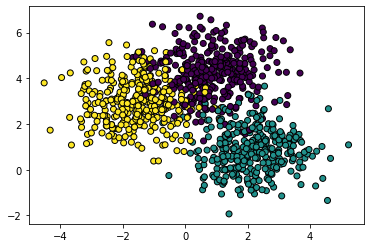

In [3]:
# Dataa kannattaa aina "katsoa" tai tutkia ennenkuin dataa analysoidaan algoritmien avulla.
# Piirretään 2-ulotteinen data ja katsotaan näkyykö siinä ryhmärakennetta.

plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=X_cluster_index, edgecolor='k')

Tarkastele ylläolevaa kuvaa. Näetkö datassa selkeitä ryhmiä? Miltä data vaikuttaa?

Myöhemmin muutamme klustereiden määrää ja katsomme miten tulokset muuttuvat.

## Hierarkinen klusterointialgoritmi

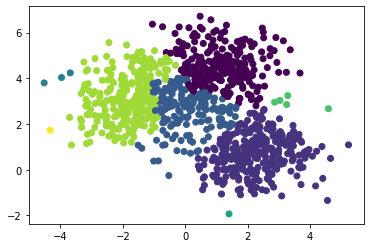

In [4]:
# Nyt ajetaan hierarkinen klusterointi-algoritmi keinotekoiselle
# datalle, jossa on siis kolme klusteria:

# Hierarkinen klusterointi tarvitsee linkage -parametrin, 
hier_clust = AgglomerativeClustering(linkage='average', n_clusters=8)
hier_clust.fit(X_data)

# Klusterit saadaan mallin attribuutista labels_:
klusteri_jasenyys = hier_clust.labels_

# Plottaa klusterit omilla väreillä:
plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=klusteri_jasenyys)

## Tehtävä h1: muuta klusterien määrää datassa

Toista ylläoleva analyysi muuttamalla algoritmin parametreja. Luo esimerkiksi 10 ryhmää vaihtamalla make_blobs funktion parametriä (centers=3). Aja algoritmi ja tulkitse tulosta. Mitä tapahtuu kun datassa on kolme klusteria ja algoritmi etsii datasta kymmentä klusteria?

## Tehtävä h2: muuta hierarkisen klusteroinnin linkkifunktiota

Hierarkinen klusterointi tarvitsee linkkifunktion (linkage-parametrin), joka vaikuttaa siihen miten klustereita yhdistetään toisiinsa. Tutustu erilaisiin linkage -funktioihin dokumentaatiossa: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html ja kokeile eri linkage -funktioiden vaikutusta klusterointiin.

## Tehtävä h3: esitä hierarkisen klusteroinnin puurakenne eli dendrogrammin. 

Tutustu SciPy-kirjaston dokumentaatioon miten dendrogrammi esitetään: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

Piirrä hierarkisen klusteroinnin dendrogrammi eli ryhmittelypuu.

## Tehtävä h4: klusteroi joku muu datajoukko

Lataa joku aikaisemmin käsitelty datajoukko ja tee sille klusterointi. Huomaa, ettei hierarkista klusterointia saa ajettua kovin isolle datajoukolle. Sopivia datajoukkoja ovat sellaiset, joissa on kymmeniä datavektoreita.